
## Motivation and Objective

  According to the journal paper associated with this work , it is mentioned that the main features which were mapped onto the target variables were derived from an individual’s voice measures. In essence, the task at hand is to study and evaluate the ability of this dataset in predicting the target variables, which are Motor and Total UPDRS values. It is a worthwhile cause as Parkinson’s is a crippling illness which affects a significant number of individuals, especially as they mature, in society today.
  
  The goals of the project is to apply various machine learning modelling techniques to this dataset and evaluate the resulting metrics to derive the optimal combination of hyperparameters and modelling approaches . By comparing various algorithms and models, we can deduce and apply the most accurate and effective model. This will then be subject to tweaking and tuning including generalisation, training and testing, and prediction, cross-validation and multiple machine learning models.


 1. By validating and predicting outcomes based on this dataset, we may be able to better understand the key indicators of the progression and severity of the disease. 

2. Another advantage would be to allow critical patients, who are unable to travel to and from the hospital or clinic, to use the at-home testing device, which was utilized in this study to record their voice measures which were then studied. 



## Data Characterization
Data used in this study comes from the life area, it is a multivariate Data Set containing 5875 observations with 22 real and integer attributes.
Citation: A Tsanas, MA Little, PE McSharry, LO Ramig (2009) 'Accurate telemonitoring of Parkinson’s disease progression by non-invasive speech tests', IEEE Transactions on Biomedical Engineering (to appear).
This dataset is composed of a range of biomedical voice measurements from 42 people with early-stage Parkinson's disease recruited to a six-month trial of a telemonitoring device for remote symptom progression monitoring. The recordings were automatically captured in the patient's homes.
Columns in the table contain subject number, subject age, subject gender, time interval from baseline recruitment date, motor UPDRS, total UPDRS, and 16 biomedical voice measures. Each row corresponds to one of 5,875 voice recording from these individuals. The main aim of the data is to predict the motor and total UPDRS scores ('motor_UPDRS' and 'total_UPDRS') from the 16 voice measures.




# Attribute Information:

subject# - Integer that uniquely identifies each subject

age - Subject 1

sex - Subject gender '0' - male, '1' - female

test_time - Time since recruitment into the trial. The integer part is the number of days since recruitment.

motor_UPDRS - Clinician's motor UPDRS score, linearly interpolated

total_UPDRS - Clinician's total UPDRS score, linearly interpolated

Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP - Several measures of variation in fundamental frequency

Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

RPDE - A nonlinear dynamical complexity measure

DFA - Signal fractal scaling exponent

PPE - A nonlinear measure of fundamental frequency variation

# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn import metrics

sns.set()

from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import statsmodels.formula.api as smf

from sklearn.feature_selection import VarianceThreshold

# Business Understanding

Parkinson disease also known as Tremor and is caused due to the declination of the dopamine level in the brain which affects the motor functions, that is the physical functioning of a person. The neurons in the body of a person starts to die and are irreplaceable with increase in age of the person. The effects of the neurological conditions and the dropping of dopamine levels in patients body appear very slowly, hence it is hard to notice until the patients condition needs a medical attention. Parkinson disease also known as Tremor and is caused due to the declination of the dopamine level in the brain which affects the motor functions, that is the physical functioning of a person. The neurons in the body of a person starts to die and are irreplaceable with increase in age of the person. The effects of the neurological conditions and the dropping of dopamine levels in patients body appear very slowly, hence it is hard to notice until the patients condition needs a medical attention

# Data Understanding

Data Understanding and its objective is to know what can be expected and achieved from the data. It checks the quality of the data, in several terms, such as data completeness, values distributions, data governance compliance.

## Import the data¶

In [2]:
# Read the CSV 

## Use this code of line if you want to load file using google drive
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")



## Use this code of line if you want to load file locally
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data")

Here we got an overview of the data available to us

In [3]:
df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
df.dtypes

subject#           int64
age                int64
sex                int64
test_time        float64
motor_UPDRS      float64
total_UPDRS      float64
Jitter(%)        float64
Jitter(Abs)      float64
Jitter:RAP       float64
Jitter:PPQ5      float64
Jitter:DDP       float64
Shimmer          float64
Shimmer(dB)      float64
Shimmer:APQ3     float64
Shimmer:APQ5     float64
Shimmer:APQ11    float64
Shimmer:DDA      float64
NHR              float64
HNR              float64
RPDE             float64
DFA              float64
PPE              float64
dtype: object

In [5]:
df.shape

(5875, 22)

In [6]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 22)


In [7]:
df.count()

subject#         5875
age              5875
sex              5875
test_time        5875
motor_UPDRS      5875
total_UPDRS      5875
Jitter(%)        5875
Jitter(Abs)      5875
Jitter:RAP       5875
Jitter:PPQ5      5875
Jitter:DDP       5875
Shimmer          5875
Shimmer(dB)      5875
Shimmer:APQ3     5875
Shimmer:APQ5     5875
Shimmer:APQ11    5875
Shimmer:DDA      5875
NHR              5875
HNR              5875
RPDE             5875
DFA              5875
PPE              5875
dtype: int64

In [8]:
print(df.isnull().sum())

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64


In [9]:
df = df.dropna() 
df.count()

subject#         5875
age              5875
sex              5875
test_time        5875
motor_UPDRS      5875
total_UPDRS      5875
Jitter(%)        5875
Jitter(Abs)      5875
Jitter:RAP       5875
Jitter:PPQ5      5875
Jitter:DDP       5875
Shimmer          5875
Shimmer(dB)      5875
Shimmer:APQ3     5875
Shimmer:APQ5     5875
Shimmer:APQ11    5875
Shimmer:DDA      5875
NHR              5875
HNR              5875
RPDE             5875
DFA              5875
PPE              5875
dtype: int64

In [10]:
df.describe()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


In [11]:
print (df.describe())

          subject#          age          sex    test_time  motor_UPDRS  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000   
mean     21.494128    64.804936     0.317787    92.863722    21.296229   
std      12.372279     8.821524     0.465656    53.445602     8.129282   
min       1.000000    36.000000     0.000000    -4.262500     5.037700   
25%      10.000000    58.000000     0.000000    46.847500    15.000000   
50%      22.000000    65.000000     0.000000    91.523000    20.871000   
75%      33.000000    72.000000     1.000000   138.445000    27.596500   
max      42.000000    85.000000     1.000000   215.490000    39.511000   

       total_UPDRS    Jitter(%)  Jitter(Abs)   Jitter:RAP  Jitter:PPQ5  ...  \
count  5875.000000  5875.000000  5875.000000  5875.000000  5875.000000  ...   
mean     29.018942     0.006154     0.000044     0.002987     0.003277  ...   
std      10.700283     0.005624     0.000036     0.003124     0.003732  ...   
min       7.00000

<AxesSubplot:xlabel='test_time'>

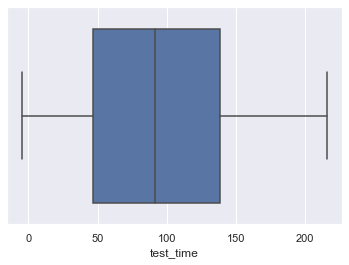

In [12]:
sns.boxplot(x=df["test_time"])

<AxesSubplot:xlabel='motor_UPDRS'>

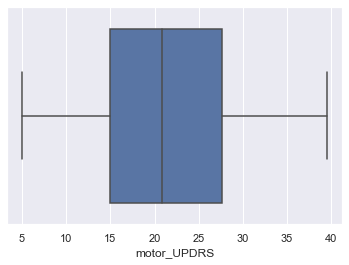

In [13]:
sns.boxplot(x=df["motor_UPDRS"])

<AxesSubplot:xlabel='total_UPDRS'>

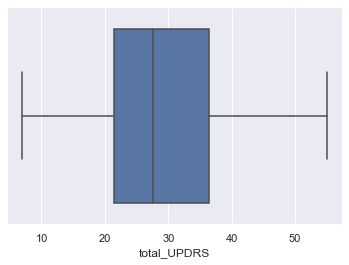

In [14]:
sns.boxplot(x=df["total_UPDRS"])

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

subject#         23.000000
age              14.000000
sex               1.000000
test_time        91.597500
motor_UPDRS      12.596500
total_UPDRS      15.028000
Jitter(%)         0.003220
Jitter(Abs)       0.000031
Jitter:RAP        0.001710
Jitter:PPQ5       0.001640
Jitter:DDP        0.005140
Shimmer           0.020630
Shimmer(dB)       0.190000
Shimmer:APQ3      0.011295
Shimmer:APQ5      0.012965
Shimmer:APQ11     0.017050
Shimmer:DDA       0.033905
NHR               0.020508
HNR               5.038000
RPDE              0.144260
DFA               0.115155
PPE               0.108150
dtype: float64


In [16]:
df = df[~((df < (Q1-1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
df.shape

(4944, 22)

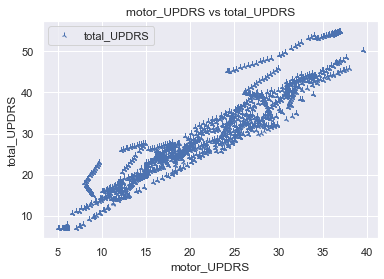

In [18]:
df.plot(x='motor_UPDRS', y='total_UPDRS', style='2')
plt.title('motor_UPDRS vs total_UPDRS')
plt.xlabel('motor_UPDRS')
plt.ylabel('total_UPDRS')
plt.show()

We have taken Motor and total for doing our analysis. When you run the code above you should see a 2-D graph between MinTemp and MaxTemp.

/Users/user/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_UPDRS', ylabel='Density'>

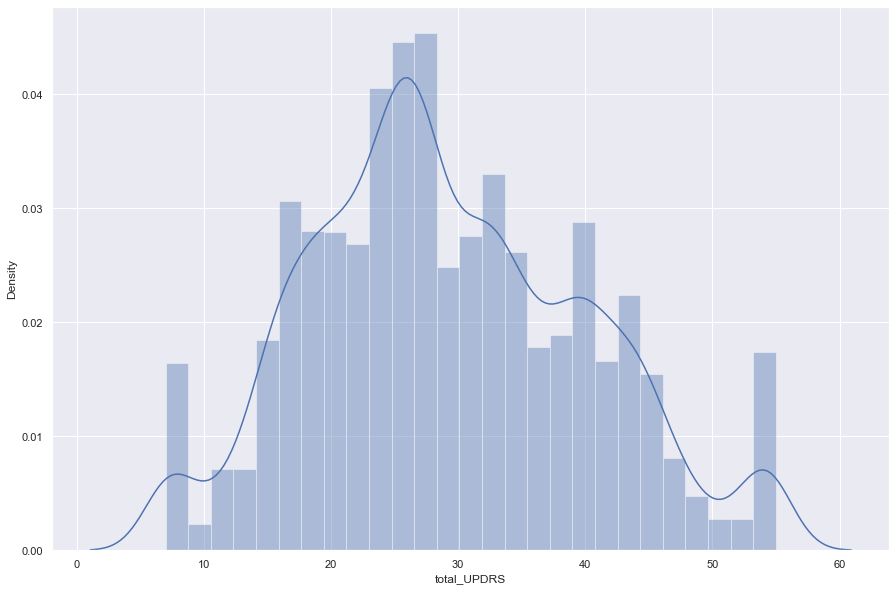

In [19]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['total_UPDRS'])

divided the data into “attributes” and “labels”. Attributes are the independent variables while labels are dependent variables whose values are to be predicted. In our dataset, we only have 22 columns but we will only be using 2 columns. We want to predict the total depending upon the motor recorded. Therefore our attribute set will consist of the “motor” column which is stored in the X variable, and the label will be the “total” column which is stored in y variable.

# Data exploration

In [20]:
# Profile report

#!pip install pandas-profiling
##generate a basic report on the input DataFrame. 
#import pandas_profiling
##export the html file named as ML_output.html 
#profile = pandas_profiling.ProfileReport(df)
#profile.to_file("ML_output

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4944 entries, 0 to 5874
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   subject#       4944 non-null   int64  
 1   age            4944 non-null   int64  
 2   sex            4944 non-null   int64  
 3   test_time      4944 non-null   float64
 4   motor_UPDRS    4944 non-null   float64
 5   total_UPDRS    4944 non-null   float64
 6   Jitter(%)      4944 non-null   float64
 7   Jitter(Abs)    4944 non-null   float64
 8   Jitter:RAP     4944 non-null   float64
 9   Jitter:PPQ5    4944 non-null   float64
 10  Jitter:DDP     4944 non-null   float64
 11  Shimmer        4944 non-null   float64
 12  Shimmer(dB)    4944 non-null   float64
 13  Shimmer:APQ3   4944 non-null   float64
 14  Shimmer:APQ5   4944 non-null   float64
 15  Shimmer:APQ11  4944 non-null   float64
 16  Shimmer:DDA    4944 non-null   float64
 17  NHR            4944 non-null   float64
 18  HNR     

In [22]:
# Check missing/null values in variables
df.isna().sum()

subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

As we have checked, we can see that there is no missing value

In [23]:
#check duplicated rows
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5870    False
5871    False
5872    False
5873    False
5874    False
Length: 4944, dtype: bool

In [24]:
#find the total number of duplicates
df.duplicated().sum()  #there are no duplicates

0

In [25]:
# Set how many columns to display
pd.options.display.max_columns = None 
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,0.00500,0.01896,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,0.00358,0.02315,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,0.00456,0.02499,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,0.00383,0.01484,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


# Corelation between features

In [26]:
df.corr()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
subject#,1.000000,0.029225,0.219421,0.017439,0.239968,0.257466,0.119699,0.023090,0.111210,0.102516,0.111280,0.028128,0.016186,-0.004352,0.007914,0.081087,-0.004350,0.075593,-0.138555,0.109241,0.152171,0.119513
age,0.029225,1.000000,0.050450,0.019131,0.224313,0.260865,0.144313,0.064512,0.108817,0.134295,0.108837,0.245296,0.259327,0.211008,0.224673,0.281684,0.211005,0.164206,-0.158731,0.112264,-0.170207,0.162236
sex,0.219421,0.050450,1.000000,0.012154,-0.030586,-0.086818,-0.133181,-0.414407,-0.004541,-0.141813,-0.004562,-0.160490,-0.168546,-0.124766,-0.171019,-0.209691,-0.124763,-0.106199,0.155624,-0.256719,-0.099567,-0.233534
test_time,0.017439,0.019131,0.012154,1.000000,0.076580,0.081748,-0.001033,-0.004091,-0.024641,-0.000137,-0.024610,-0.017826,-0.008573,-0.012784,-0.016208,-0.015460,-0.012776,-0.023930,0.033900,-0.035845,0.008993,-0.002774
motor_UPDRS,0.239968,0.224313,-0.030586,0.076580,1.000000,0.946935,0.079440,-0.010847,0.058382,0.075141,0.058445,0.089191,0.100759,0.062377,0.072967,0.130778,0.062378,0.082232,-0.129016,0.099856,-0.168217,0.128878
total_UPDRS,0.257466,0.260865,-0.086818,0.081748,0.946935,1.000000,0.088980,0.048088,0.067384,0.083324,0.067433,0.109464,0.119361,0.085212,0.097215,0.144763,0.085215,0.094143,-0.159509,0.141968,-0.158695,0.142558
Jitter(%),0.119699,0.144313,-0.133181,-0.001033,0.079440,0.088980,1.000000,0.862068,0.931535,0.943293,0.931562,0.506629,0.530419,0.463366,0.474633,0.497676,0.463366,0.669593,-0.650017,0.419036,0.449159,0.786409
Jitter(Abs),0.023090,0.064512,-0.414407,-0.004091,-0.010847,0.048088,0.862068,1.000000,0.740897,0.833347,0.740910,0.465243,0.473698,0.413800,0.452834,0.484725,0.413796,0.605873,-0.653418,0.545210,0.487181,0.733253
Jitter:RAP,0.111210,0.108817,-0.004541,-0.024641,0.058382,0.067384,0.931535,0.740897,1.000000,0.913180,0.999996,0.489678,0.501720,0.479641,0.457327,0.429912,0.479641,0.616206,-0.601384,0.314570,0.410638,0.666109
Jitter:PPQ5,0.102516,0.134295,-0.141813,-0.000137,0.075141,0.083324,0.943293,0.833347,0.913180,1.000000,0.913228,0.548648,0.563313,0.510621,0.529847,0.538151,0.510619,0.611137,-0.687094,0.390995,0.498288,0.783199


<AxesSubplot:>

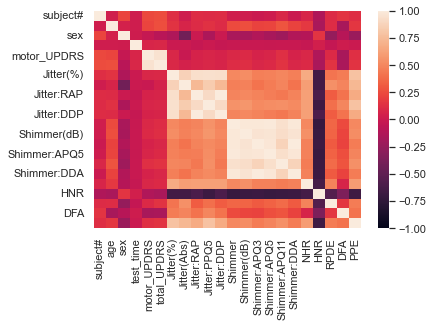

In [27]:
# We define a diverging colourmap so that 0.0 is white
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(df.corr(), vmin=-1.0, vmax=1.0)

From the heatmap we can see that only 16 attributes correlate properly with the target and these are the selected attributes to clearly predict the target

# Spliting the data

In [36]:
# Targets ('motor_UPDRS' and 'total_UPDRS') 
y = df[['motor_UPDRS', 'total_UPDRS']]  # Labels
df1 = df.drop(y, axis = 1)
df1.head()

,subject#,age,sex,test_time,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,0.00300,0.000017,0.00132,0.00150,0.00395,0.02024,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,0.00481,0.000025,0.00205,0.00208,0.00616,0.01675,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,0.00528,0.000027,0.00191,0.00264,0.00573,0.02309,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,0.00335,0.000020,0.00093,0.00130,0.00278,0.01703,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [37]:
df2=df1.drop(df[['age', 'sex', 'test_time', 'subject#']], axis = 1)
df2.head()


In [38]:
X = df2

Next, we split 95% of the data to the training set while 5% of the data to test set using below code. The test_size variable is where we actually specify the proportion of the test set.

In [39]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05,  random_state = 5) # 95% training and 5 test
X_train.shape

(4696, 16)

In [82]:
print ('x.shape, y.shape before splitting : ',X.shape, y.shape)
print ('x_train, x_test, y_train, y_test after splitting :', X_train.shape, X_test.shape, y_train.shape, y_test.shape)

x.shape, y.shape before splitting :  (4944, 16) (4944, 2)
x_train, x_test, y_train, y_test after splitting : (4696, 16) (248, 16) (4696, 2) (248, 2)


In [34]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler

# Create and initialise an object sc by calling a method StandardScaler()
sc = StandardScaler()

# Scale both train data and test data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

Training the algorithm

In [41]:
reg_lin = LinearRegression()
reg_lin.fit(X_train, y_train) 


LinearRegression()


As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slope calculated by the linear regression algorithm for our dataset, execute the following code.

Now that we have trained our algorithm, it’s time to make some predictions. To do so, we will use our test data and see how accurately our algorithm predicts the percentage score. To make predictions on the test data, execute the following script:

In [44]:
y_pred = reg_lin.predict(X_test)

Now compare the actual output values for X_test with the predicted values, execute the following script:

In [45]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [46]:

# Calculate the mean values and Standard deviation
get_cv_scores(reg_lin)

CV Mean:  0.13426424591337485
STD:  0.03466027709839628




To retrieve the intercept and  the slope:

In [85]:
print(reg_lin.intercept_)
print(reg_lin.coef_)

[51.53093621 73.27329101]
[[ 1.18848824e+03 -1.72587113e+05 -5.13541073e+04  1.17428604e+03
   1.69650765e+04  1.61922538e+02  4.95860887e+00 -6.04164995e+03
  -3.59400598e+02  2.60801247e+02  1.89601474e+03 -1.07929454e+02
  -5.79241559e-01  5.92436325e+00 -3.66399042e+01  1.61027492e+01]
 [ 3.59761160e+02 -8.61068883e+04 -6.02576807e+04  2.37528807e+02
   2.03648604e+04  1.12784796e+02  1.58491718e+01 -2.94122360e+04
  -2.84812891e+02  2.56298913e+02  9.63598681e+03 -1.76491864e+02
  -8.35895026e-01  8.47144853e+00 -5.17643948e+01  2.44898394e+01]]


# RandomForestRegressor

In [55]:
rf_reg= RandomForestRegressor(n_estimators = 1000, random_state = 10)
rf_reg.fit(X_train, y_train)


RandomForestRegressor(n_estimators=1000, random_state=10)

In [56]:
y_pred = rf_reg.predict (X_test)

In [58]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',
np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.379404719556458
Mean Squared Error: 48.05504296587348
Root Mean Squared Error: 6.932174476012089


## Cross-Validation

In [48]:
rf_reg= RandomForestRegressor(n_estimators = 1000, random_state = 10)
rf_reg.fit(X,y)


RandomForestRegressor(n_estimators=1000, random_state=10)

In [68]:
print ("Train Accuracy:",rf_reg.score (X_train, y_train))
print ("Test Accuracy:",rf_reg.score (X_test, y_test))

Train Accuracy: 0.9188169175203087
Test Accuracy: 0.45843327336360923


# Gridsearch cross - validation

In [95]:

from sklearn.model_selection import GridSearchCV

params = [{"n_estimators": [500,1000,1100,1700]}]
rfr = GridSearchCV(rf_reg,
                   param_grid = params,
                   scoring = "accuracy",
                   cv = 5)
rfr.fit(X_train, y_train)


/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/

ValueError: continuous-multioutput is not supported

In [ ]:

rfr.score(X_train, y_train)